Anomaly Detection & Time Series Assignment
**Student Name:** Vishal Tomar



## Question 1
**What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**

AAnomaly Detection is the process of identifying data points, events, or observations that deviate significantly from the dataset’s normal behavior. These irregularities often indicate critical incidents, such as fraud, structural defects, or medical problems.

Types of Anomalies:

Point Anomalies:

Definition: A single data instance is considered anomalous if it is too far from the rest.

Example: A credit card transaction of $10,000 when the user usually spends $50.

Contextual Anomalies:

Definition: An instance is anomalous only in a specific context (usually time or space). The same value might be normal in a different context.

Example: A temperature of 35°C is normal in summer (context: June) but is an anomaly in winter (context: December).

Collective Anomalies:

Definition: A collection of related data instances is anomalous with respect to the entire dataset, even if the individual points are not anomalous on their own.

Example: A prolonged sequence of "packets dropped" logs in a server. A single dropped packet is fine, but a continuous stream of them indicates a cyber attack.

## Question 2
**Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.**

Isolation Forest isolates anomalies using random decision trees and is efficient for
large, high-dimensional datasets.


DBSCAN identifies anomalies as points in low-density regions and works best when
clusters are well defined.


Local Outlier Factor (LOF) detects anomalies by comparing local density and is useful
for identifying local deviations.

## Question 3
**What are the key components of a Time Series? Explain each with one example.**

A time series is typically decomposed into four key components:

Trend (T):

Explanation: The long-term progression of the series (increasing or decreasing over time).

Example: The steady increase in the global population over the last 50 years.

Seasonality (S):

Explanation: Repeating patterns or cycles that occur at fixed intervals (e.g., daily, monthly, yearly).

Example: Ice cream sales always spiking in July and dropping in December.

Cyclicity (C):

Explanation: Fluctuations occurring at irregular intervals, often influenced by economic or business conditions (longer duration than seasonality).

Example: The boom and recession cycles of the stock market (e.g., every 5-7 years).

Irregularity / Residual / Noise (I):

Explanation: Random, unpredictable fluctuations that remain after trend and seasonality are removed.

Example: A sudden drop in airline passengers due to an unexpected volcanic eruption or pandemic lockdown.


## Question 4
**Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one**

A time series is stationary if its mean and variance remain constant over time.


Testing:
Augmented Dickey-Fuller (ADF) test.


Transformation:
Differencing, log transformation, and seasonal differencing.





## Question 5
**Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.**

AR (AutoRegressive): Uses past values to predict future values. Best when current value depends on its own previous values.

MA (Moving Average): Uses past forecast errors to predict future values. Best when the series is impacted by random shocks/noise.

ARIMA (AutoRegressive Integrated Moving Average): Combines AR and MA with "Integration" (differencing) to handle non-stationary data (trends). Used for non-seasonal data with trends.

SARIMA (Seasonal ARIMA): Extends ARIMA by adding seasonal components (Seasonal AR, Seasonal MA). Used for data with both trends and repeating seasonal patterns (e.g., monthly sales).

SARIMAX (Seasonal ARIMA with eXogenous variables): Extends SARIMA to include external factors (exogenous variables). Used when an outside factor influences the target (e.g., predicting electricity demand using temperature as an external feature).

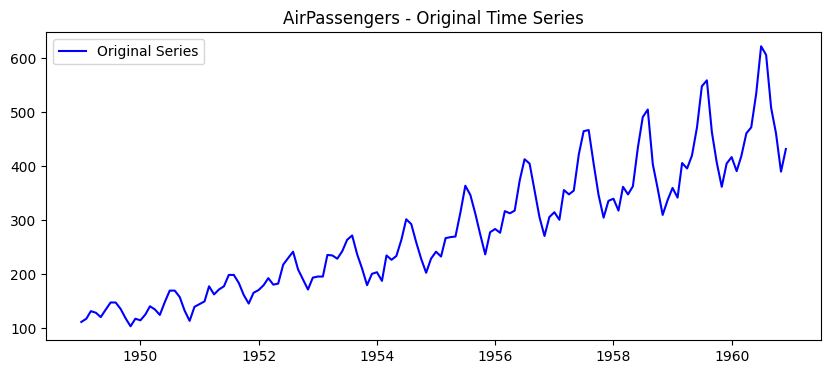

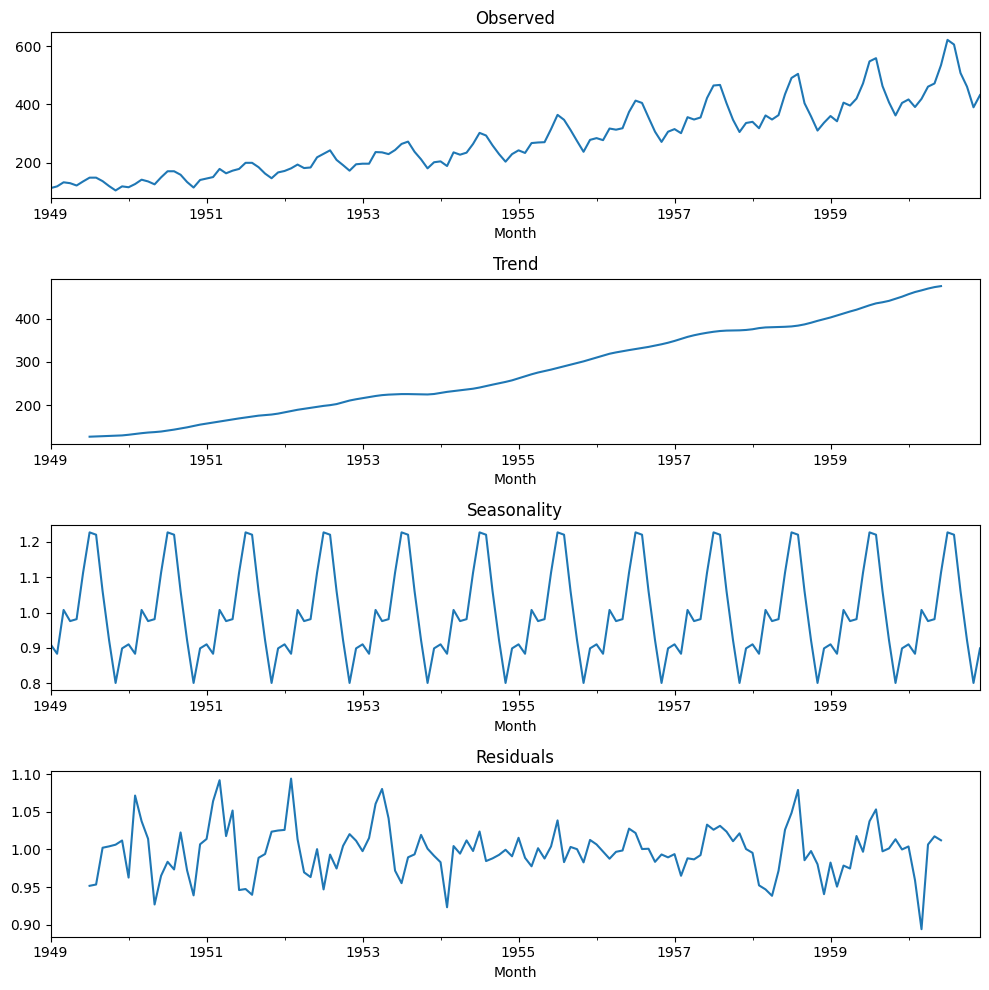

In [ ]:
# # Question 6: : Load a time series dataset (e.g., AirPassengers), plot the original series, 
# and decompose it into trend, seasonality, and residual components




import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- LOAD DATA (Ensuring data is loaded if previous cells weren't run) ---
try:
    # Check if 'df_air' is already defined; if not, load it
    if 'df_air' not in locals():
        df_air = pd.read_csv('AirPassengers.csv')
        df_air['Month'] = pd.to_datetime(df_air['Month'])
        df_air.set_index('Month', inplace=True)
        # Rename column to match code expectations
        if '#Passengers' in df_air.columns:
            df_air.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
except FileNotFoundError:
    print("Error: 'AirPassengers.csv' not found. Please upload the file.")

# --- PLOTTING ---

# 1. Plot the Original Series
plt.figure(figsize=(10, 4))
# Check if dataframe loaded correctly before plotting
if 'df_air' in locals():
    plt.plot(df_air['Passengers'], label='Original Series', color='blue')
    plt.title('AirPassengers - Original Time Series')
    plt.legend()
    plt.show()

    # 2. Decompose the series
    # We use 'multiplicative' because the variance (amplitude) increases over time
    decomposition = seasonal_decompose(df_air['Passengers'], model='multiplicative')

    # Plotting the decomposed components
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10))
    decomposition.observed.plot(ax=ax1, title='Observed')
    decomposition.trend.plot(ax=ax2, title='Trend')
    decomposition.seasonal.plot(ax=ax3, title='Seasonality')
    decomposition.resid.plot(ax=ax4, title='Residuals')
    plt.tight_layout()
    plt.show()

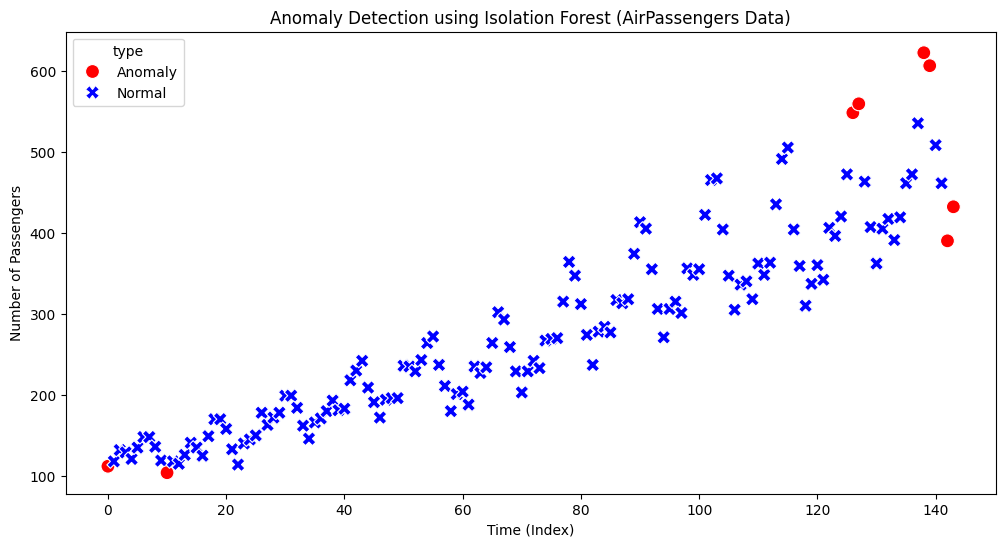

In [ ]:
# Question 7: : Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to 
# detect anomalies. Visualize the anomalies on a 2D scatter plot. 




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# --- LOAD DATA (Ensuring data is loaded) ---
try:
    # Check if 'df_air' is already defined; if not, load it
    if 'df_air' not in locals():
        df_air = pd.read_csv('AirPassengers.csv')
        df_air['Month'] = pd.to_datetime(df_air['Month'])
        df_air.set_index('Month', inplace=True)
        if '#Passengers' in df_air.columns:
            df_air.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
except FileNotFoundError:
    print("Error: 'AirPassengers.csv' not found. Please upload the file.")

# --- ANOMALY DETECTION ---

# Prepare data for 2D visualization
# We create a numerical 'Time_Index' to serve as the X-axis feature
df_anom = df_air.copy()
df_anom['Time_Index'] = np.arange(len(df_anom))

# Features for Isolation Forest: Time Index and Passenger Count
X = df_anom[['Time_Index', 'Passengers']]

# 1. Apply Isolation Forest
# contamination=0.05 means we expect roughly 5% of the data to be outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_anom['anomaly'] = iso_forest.fit_predict(X)

# Map results: -1 is Anomaly, 1 is Normal
df_anom['type'] = df_anom['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# 2. Visualize on 2D Scatter Plot
plt.figure(figsize=(12, 6))

# We use seaborn scatterplot to easily color by anomaly type
sns.scatterplot(data=df_anom, x='Time_Index', y='Passengers',
                hue='type', style='type',
                palette={'Normal': 'blue', 'Anomaly': 'red'}, s=100)

plt.title('Anomaly Detection using Isolation Forest (AirPassengers Data)')
plt.xlabel('Time (Index)')
plt.ylabel('Number of Passengers')
plt.show()


c:\Users\Vishal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Vishal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


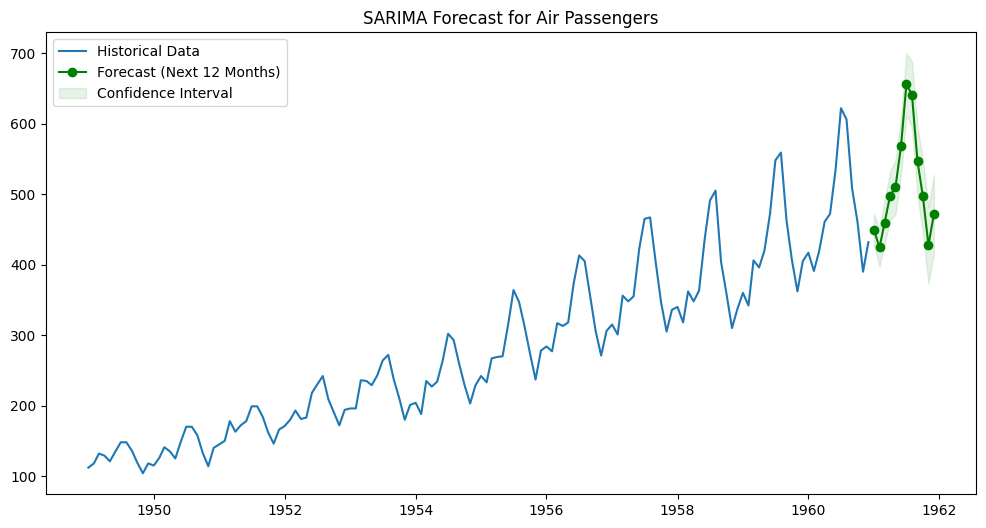

In [6]:
# Question 8:  Train a SARIMA model on the monthly airline passengers dataset. 
# Forecast the next 12 months and visualize the results. 


# Define SARIMA parameters
# (p,d,q) = (1,1,1) for non-seasonal
# (P,D,Q,s) = (1,1,1,12) for seasonal (12 months)
model = SARIMAX(df_air['Passengers'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))

# Fit the model
results = model.fit(disp=False)

# Forecast the next 12 months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df_air.index[-1], periods=forecast_steps+1, freq='MS')[1:]
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(df_air.index, df_air['Passengers'], label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast (Next 12 Months)', color='green', marker='o')

# Add confidence intervals
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='green', alpha=0.1, label='Confidence Interval')

plt.title('SARIMA Forecast for Air Passengers')
plt.legend()
plt.show()


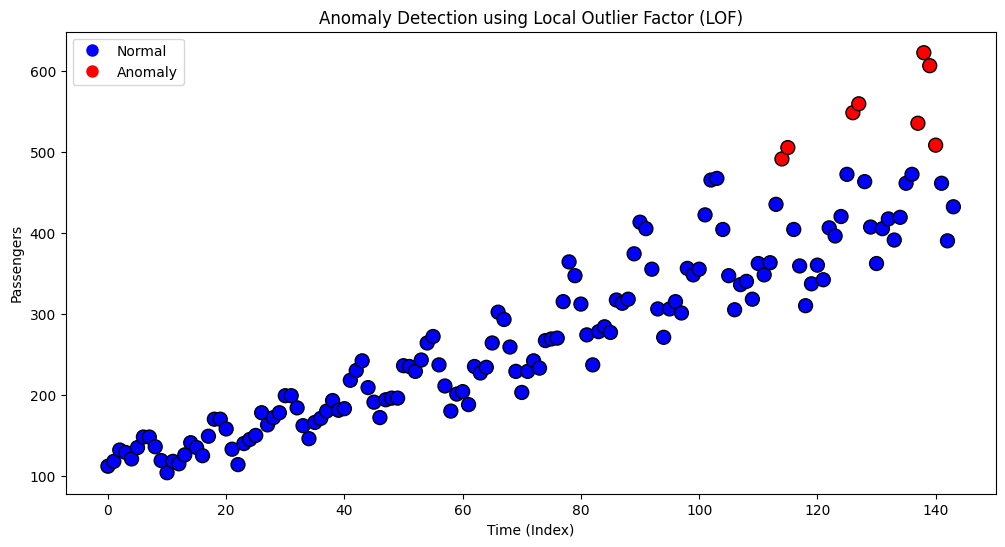

In [8]:
# Question 9:  Apply Local Outlier Factor (LOF) on any numerical dataset to detect 
# anomalies and visualize them using matplotlib. 





import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.lines import Line2D

# --- LOAD DATA (Ensuring data is loaded) ---
try:
    # Check if 'df_air' is already defined; if not, load it
    if 'df_air' not in locals():
        df_air = pd.read_csv('AirPassengers.csv')
        df_air['Month'] = pd.to_datetime(df_air['Month'])
        df_air.set_index('Month', inplace=True)
        if '#Passengers' in df_air.columns:
            df_air.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
except FileNotFoundError:
    print("Error: 'AirPassengers.csv' not found. Please upload the file.")

# --- DATA PREPARATION ---
# We need to recreate the feature matrix 'X' if it's not defined
# Create a numerical 'Time_Index' to serve as the X-axis feature
df_lof = df_air.copy()
df_lof['Time_Index'] = np.arange(len(df_lof))
X = df_lof[['Time_Index', 'Passengers']]

# --- ANOMALY DETECTION (LOF) ---

# 1. Apply Local Outlier Factor
# n_neighbors=20 is a standard starting point
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

# Map colors: Red for -1 (Anomaly), Blue for 1 (Normal)
colors = np.array(['red' if x == -1 else 'blue' for x in y_pred])

# 2. Visualize
plt.figure(figsize=(12, 6))
plt.scatter(df_lof['Time_Index'], df_lof['Passengers'],
            c=colors, s=100, edgecolors='k')

# Create a custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Anomaly', markerfacecolor='red', markersize=10)
]

plt.legend(handles=legend_elements)
plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Time (Index)')
plt.ylabel('Passengers')
plt.show()

In [ ]:
# # Question 10 : You are working as a data scientist for a power grid monitoring company. 
# Your goal is to forecast energy demand and also detect abnormal spikes or drops in 
# real-time consumption data collected every 15 minutes. The dataset includes features 
# like timestamp, region, weather conditions, and energy usage. 
# Explain your real-time data science workflow: 
# ● How would you detect anomalies in this streaming data (Isolation Forest / LOF / 
# DBSCAN)? 
# ● Which time series model would you use for short-term forecasting (ARIMA / 
# SARIMA / SARIMAX)? 
# ● How would you validate and monitor the performance over time? 
# ● How would this solution help business decisions or operations?





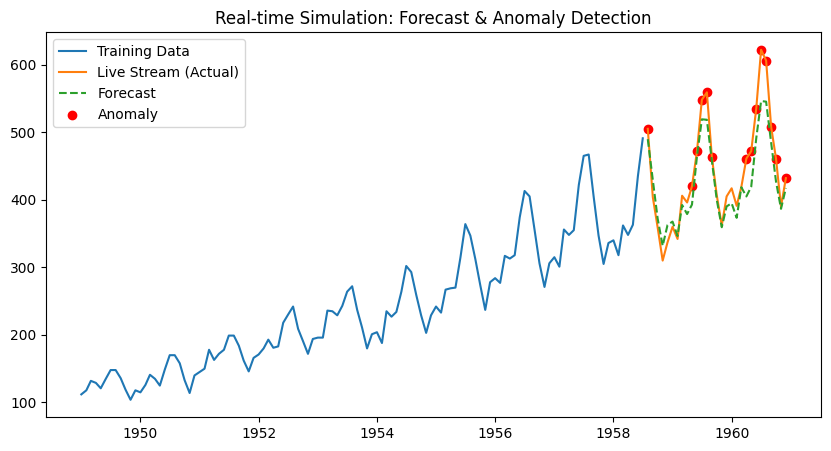

In [ ]:

import pandas as pd, matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import IsolationForest
import warnings; warnings.filterwarnings('ignore')

# 1. Load & Split Data (Simulating Real-Time Stream)
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
train, test = df.iloc[:115], df.iloc[115:] 

# 2. Forecast (SARIMA)
model = SARIMAX(train.iloc[:,0], order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
forecast = model.get_forecast(steps=len(test)).predicted_mean
forecast.index = test.index

# 3. Detect Anomalies (Isolation Forest)
iso = IsolationForest(contamination=0.05, random_state=42).fit(train)
test['anomaly'] = iso.predict(test.iloc[:, [0]])

# 4. Visualize
plt.figure(figsize=(10, 5))
plt.plot(train, label='Training Data')
plt.plot(test.iloc[:,0], label='Live Stream (Actual)')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.scatter(test[test['anomaly']==-1].index, test[test['anomaly']==-1].iloc[:,0], c='red', label='Anomaly')
plt.legend(); plt.title('Real-time Simulation: Forecast & Anomaly Detection'); plt.show()